<a href="https://colab.research.google.com/github/A0143704/MNA-IA-Equipos51/blob/main/Test_SVD_Equipo51.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

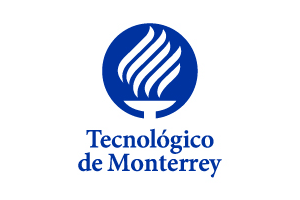

# **Maestría en Inteligencia Artificial Aplicada**
## **Curso: Inteligencia Artificial y Aprendizaje Automático**
### Tecnológico de Monterrey
### Prof Luis Eduardo Falcón Morales

## **Adtividad de la Semana 10**
### **Reducción de Dimensionalidad - Descomposición en Valores Singulares (SVD) y Sistemas de Recomendación**


**Nombres y matrículas de los integrantes del equipo:**

*  Moisés Rangel Silva A00143704
*  Jessica Lechuga Ramos A01793512
*  Fernando Ramírez Gómez A01298109
*  Francisco Javier Ramírez Arias A01316379
*  Carlos Enríquez Gorgonio A01793102


En cada sección deberás incluir todas las líneas de código necesarias para responder a cada uno de los ejercicios.

Se trabajará con el conjunto de datos llamado "Restaurant & consumer", para la generación de un 
sistema de recomendación. Estos sistemas están dentro de los llamados métodos no supervisados y que 
se basan en técnicas de reducción de dimensionalidad. 
El archivo a descargar se llama RCdata.zip y se encuentra en la siguiente liga del repositorio de la UCI: 
https://archive.ics.uci.edu/ml/datasets/Restaurant+%26+consumer+data  
En particular se trabajará con los siguientes archvios, los cuales contienen la información mínima que 
requerimos para esta actividad: rating_final.csv y geoplaces2.csv. 

In [ ]:
# Incluye aquí todos módulos, librerías y paquetes que requieras.
import numpy as np
import pandas as pd
import requests, zipfile

from io import BytesIO
from sklearn.decomposition import TruncatedSVD

# **Ejercicio-1.** 

Descarga los archivos y genera la matriz de utilidad en la cual los renglones son los usuarios 
(user_ID), las columnas los nombres de los restaurantes (name) y las entradas la evaluaciones 
generales dadas por los usuarios (rating). En particular indica el tamaño de dicha matriz y despliega 
sus primeros 10 renglones. 

In [ ]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00232/RCdata.zip'
req = requests.get(url)
zipfile.ZipFile(BytesIO(req.content)).extractall('Data/')
df_data_rating=pd.read_csv('Data/rating_final.csv', encoding = 'latin1')
df_data_geo=pd.read_csv('Data/geoplaces2.csv', encoding = 'latin1')
df_data_rating.shape,df_data_geo.shape

((1161, 5), (130, 21))

In [ ]:
df_data_rating

,userID,placeID,rating,food_rating,service_rating
0,U1077,135085,2,2,2
1,U1077,135038,2,2,1
2,U1077,132825,2,2,2
3,U1077,135060,1,2,2
4,U1068,135104,1,1,2
...,...,...,...,...,...
1156,U1043,132630,1,1,1
1157,U1011,132715,1,1,0
1158,U1068,132733,1,1,0
1159,U1068,132594,1,1,1


In [ ]:
df_data_geo

,placeID,latitude,longitude,the_geom_meter,name,address,city,state,country,fax,...,alcohol,smoking_area,dress_code,accessibility,price,url,Rambience,franchise,area,other_services
0,134999,18.915421,-99.184871,0101000020957F000088568DE356715AC138C0A525FC46...,Kiku Cuernavaca,Revolucion,Cuernavaca,Morelos,Mexico,?,...,No_Alcohol_Served,none,informal,no_accessibility,medium,kikucuernavaca.com.mx,familiar,f,closed,none
1,132825,22.147392,-100.983092,0101000020957F00001AD016568C4858C1243261274BA5...,puesto de tacos,esquina santos degollado y leon guzman,s.l.p.,s.l.p.,mexico,?,...,No_Alcohol_Served,none,informal,completely,low,?,familiar,f,open,none
2,135106,22.149709,-100.976093,0101000020957F0000649D6F21634858C119AE9BF528A3...,El Rincón de San Francisco,Universidad 169,San Luis Potosi,San Luis Potosi,Mexico,?,...,Wine-Beer,only at bar,informal,partially,medium,?,familiar,f,open,none
3,132667,23.752697,-99.163359,0101000020957F00005D67BCDDED8157C1222A2DC8D84D...,little pizza Emilio Portes Gil,calle emilio portes gil,victoria,tamaulipas,?,?,...,No_Alcohol_Served,none,informal,completely,low,?,familiar,t,closed,none
4,132613,23.752903,-99.165076,0101000020957F00008EBA2D06DC8157C194E03B7B504E...,carnitas_mata,lic. Emilio portes gil,victoria,Tamaulipas,Mexico,?,...,No_Alcohol_Served,permitted,informal,completely,medium,?,familiar,t,closed,none
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,132866,22.141220,-100.931311,0101000020957F000013871838EC4A58C1B5DF74F8E396...,Chaires,Ricardo B. Anaya,San Luis Potosi,San Luis Potosi,Mexico,?,...,No_Alcohol_Served,not permitted,informal,completely,medium,?,familiar,f,closed,none
126,135072,22.149192,-101.002936,0101000020957F0000E7B79B1DB94758C1D29BC363D8AA...,Sushi Itto,Venustiano Carranza 1809 C Polanco,San Luis Potosi,SLP,Mexico,?,...,No_Alcohol_Served,none,informal,no_accessibility,medium,sushi-itto.com.mx,familiar,f,closed,none
127,135109,18.921785,-99.235350,0101000020957F0000A6BF695F136F5AC1DADF87B20556...,Paniroles,?,?,?,?,?,...,Wine-Beer,not permitted,informal,no_accessibility,medium,?,quiet,f,closed,Internet
128,135019,18.875011,-99.159422,0101000020957F0000B49B2E5C6E785AC12F9D58435241...,Restaurant Bar Coty y Pablo,Paseo de Las Fuentes 24 Pedregal de Las Fuentes,Jiutepec,Morelos,Mexico,?,...,No_Alcohol_Served,none,informal,completely,low,?,familiar,f,closed,none


Integrando una sola matriz donde se incluya tanto el "rating" (calificación) dada por los usarios y la localizacón geográfica de cada restaurante

In [ ]:
df_Data = pd.merge(df_data_rating, df_data_geo, on='placeID')
df_Data.shape

(1161, 25)

In [ ]:
df_Data.columns

Index(['userID', 'placeID', 'rating', 'food_rating', 'service_rating',
       'latitude', 'longitude', 'the_geom_meter', 'name', 'address', 'city',
       'state', 'country', 'fax', 'zip', 'alcohol', 'smoking_area',
       'dress_code', 'accessibility', 'price', 'url', 'Rambience', 'franchise',
       'area', 'other_services'],
      dtype='object')

In [ ]:
df_Data.head(10)

,userID,placeID,rating,food_rating,service_rating,latitude,longitude,the_geom_meter,name,address,...,alcohol,smoking_area,dress_code,accessibility,price,url,Rambience,franchise,area,other_services
0,U1077,135085,2,2,2,22.150802,-100.98268,0101000020957F00009F823DA6094858C18A2D4D37F9A4...,Tortas Locas Hipocampo,Venustiano Carranza 719 Centro,...,No_Alcohol_Served,not permitted,informal,no_accessibility,medium,?,familiar,f,closed,none
1,U1108,135085,1,2,1,22.150802,-100.98268,0101000020957F00009F823DA6094858C18A2D4D37F9A4...,Tortas Locas Hipocampo,Venustiano Carranza 719 Centro,...,No_Alcohol_Served,not permitted,informal,no_accessibility,medium,?,familiar,f,closed,none
2,U1081,135085,1,2,1,22.150802,-100.98268,0101000020957F00009F823DA6094858C18A2D4D37F9A4...,Tortas Locas Hipocampo,Venustiano Carranza 719 Centro,...,No_Alcohol_Served,not permitted,informal,no_accessibility,medium,?,familiar,f,closed,none
3,U1056,135085,2,2,2,22.150802,-100.98268,0101000020957F00009F823DA6094858C18A2D4D37F9A4...,Tortas Locas Hipocampo,Venustiano Carranza 719 Centro,...,No_Alcohol_Served,not permitted,informal,no_accessibility,medium,?,familiar,f,closed,none
4,U1134,135085,2,1,2,22.150802,-100.98268,0101000020957F00009F823DA6094858C18A2D4D37F9A4...,Tortas Locas Hipocampo,Venustiano Carranza 719 Centro,...,No_Alcohol_Served,not permitted,informal,no_accessibility,medium,?,familiar,f,closed,none
5,U1116,135085,2,2,2,22.150802,-100.98268,0101000020957F00009F823DA6094858C18A2D4D37F9A4...,Tortas Locas Hipocampo,Venustiano Carranza 719 Centro,...,No_Alcohol_Served,not permitted,informal,no_accessibility,medium,?,familiar,f,closed,none
6,U1132,135085,2,2,2,22.150802,-100.98268,0101000020957F00009F823DA6094858C18A2D4D37F9A4...,Tortas Locas Hipocampo,Venustiano Carranza 719 Centro,...,No_Alcohol_Served,not permitted,informal,no_accessibility,medium,?,familiar,f,closed,none
7,U1120,135085,0,0,0,22.150802,-100.98268,0101000020957F00009F823DA6094858C18A2D4D37F9A4...,Tortas Locas Hipocampo,Venustiano Carranza 719 Centro,...,No_Alcohol_Served,not permitted,informal,no_accessibility,medium,?,familiar,f,closed,none
8,U1036,135085,2,2,2,22.150802,-100.98268,0101000020957F00009F823DA6094858C18A2D4D37F9A4...,Tortas Locas Hipocampo,Venustiano Carranza 719 Centro,...,No_Alcohol_Served,not permitted,informal,no_accessibility,medium,?,familiar,f,closed,none
9,U1084,135085,2,2,2,22.150802,-100.98268,0101000020957F00009F823DA6094858C18A2D4D37F9A4...,Tortas Locas Hipocampo,Venustiano Carranza 719 Centro,...,No_Alcohol_Served,not permitted,informal,no_accessibility,medium,?,familiar,f,closed,none


En vista que existen entre los datos, usuarios que no han visitados todos los restaurantes, se pondrá en 0 todas las columnas que tiene que ver con los puntajes de los lugares de comida, pero como la calificación actualmente se puntea entre 0 y 2 se reemplazara entre 1 a 3 para que exista una distinción entre los usuarios que califican el restaurante con la por calificación y los que no han visitado el lugar o no han le han asignado un valor.

In [ ]:
df_Data.rating = df_Data.rating + 1
df_Data.food_rating = df_Data.food_rating + 1
df_Data.service_rating = df_Data.service_rating + 1
df_Data

,userID,placeID,rating,food_rating,service_rating,latitude,longitude,the_geom_meter,name,address,...,alcohol,smoking_area,dress_code,accessibility,price,url,Rambience,franchise,area,other_services
0,U1077,135085,3,3,3,22.150802,-100.982680,0101000020957F00009F823DA6094858C18A2D4D37F9A4...,Tortas Locas Hipocampo,Venustiano Carranza 719 Centro,...,No_Alcohol_Served,not permitted,informal,no_accessibility,medium,?,familiar,f,closed,none
1,U1108,135085,2,3,2,22.150802,-100.982680,0101000020957F00009F823DA6094858C18A2D4D37F9A4...,Tortas Locas Hipocampo,Venustiano Carranza 719 Centro,...,No_Alcohol_Served,not permitted,informal,no_accessibility,medium,?,familiar,f,closed,none
2,U1081,135085,2,3,2,22.150802,-100.982680,0101000020957F00009F823DA6094858C18A2D4D37F9A4...,Tortas Locas Hipocampo,Venustiano Carranza 719 Centro,...,No_Alcohol_Served,not permitted,informal,no_accessibility,medium,?,familiar,f,closed,none
3,U1056,135085,3,3,3,22.150802,-100.982680,0101000020957F00009F823DA6094858C18A2D4D37F9A4...,Tortas Locas Hipocampo,Venustiano Carranza 719 Centro,...,No_Alcohol_Served,not permitted,informal,no_accessibility,medium,?,familiar,f,closed,none
4,U1134,135085,3,2,3,22.150802,-100.982680,0101000020957F00009F823DA6094858C18A2D4D37F9A4...,Tortas Locas Hipocampo,Venustiano Carranza 719 Centro,...,No_Alcohol_Served,not permitted,informal,no_accessibility,medium,?,familiar,f,closed,none
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1156,U1061,132958,3,3,3,22.144979,-101.005683,0101000020957F000049095EB34A4858C15CB4BD1EE1AB...,tacos los volcanes,avenida hivno nacional,...,No_Alcohol_Served,none,informal,completely,low,?,quiet,t,closed,none
1157,U1025,132958,2,1,1,22.144979,-101.005683,0101000020957F000049095EB34A4858C15CB4BD1EE1AB...,tacos los volcanes,avenida hivno nacional,...,No_Alcohol_Served,none,informal,completely,low,?,quiet,t,closed,none
1158,U1097,132958,3,2,2,22.144979,-101.005683,0101000020957F000049095EB34A4858C15CB4BD1EE1AB...,tacos los volcanes,avenida hivno nacional,...,No_Alcohol_Served,none,informal,completely,low,?,quiet,t,closed,none
1159,U1096,132958,2,3,3,22.144979,-101.005683,0101000020957F000049095EB34A4858C15CB4BD1EE1AB...,tacos los volcanes,avenida hivno nacional,...,No_Alcohol_Served,none,informal,completely,low,?,quiet,t,closed,none


El tamaño de dicha matriz combinada es de **1,161 renglones** (usarios) y **25** columnas (calificaciones y localización geográfica)

# **Ejercicio-2.**

Con el objetivo de obtener la información con respecto a los vectores latentes (*eighenvectors*) de los restaurantes, 
obtener dicha factorización SVD utilizando todas las componentes posibles, es decir, usando todos 
sus valores singulares. En particular indica la cantidad de valores singulares obtenidos. 

In [ ]:
# Matriz transpuesta
# 0 significa no estuvo en ese restaurante
df_transposed = df_Data.pivot_table(values='rating', index='userID', columns='name')
df_transposed.fillna(0,inplace=True)
df_transposed
df_transposed.head(10)

name,Abondance Restaurante Bar,Arrachela Grill,Cabana Huasteca,Cafe Chaires,Cafeteria cenidet,Cafeteria y Restaurant El Pacifico,Carls Jr,Carnitas Mata Calle 16 de Septiembre,Carreton de Flautas y Migadas,Cenaduria El RincÃ³n de Tlaquepaque,...,puesto de tacos,rockabilly,shi ro ie,sirloin stockade,tacos abi,tacos de barbacoa enfrente del Tec,tacos de la estacion,tacos los volcanes,tortas hawai,vips
userID,,,,,,,,,,,,,,,,,,,,,
U1001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
U1002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
U1003,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
U1004,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0
U1005,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
U1006,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
U1007,0.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
U1008,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
U1009,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
X_data = df_transposed.T

In [ ]:
# Para confirmar: número de componentes debe ser menor que el número de características que en este problema son 138 (usuarios)
SVD = TruncatedSVD(n_components=(X_data.shape[1]-1), random_state=1)  
SVD.fit(X_data)

TruncatedSVD(n_components=137, random_state=1)

La cantidad de valores singulares obtenidos son 137, menos a los 138 carcaterísiticas (138)

In [ ]:
sv = 137   
print('La cantidad de valores singulares obtenidos es: %d' % sv)
print('%.1f%%' %  (100 * (1- (SVD.singular_values_[0:sv]).sum() / (SVD.singular_values_).sum())))

La cantidad de valores singulares obtenidos es: 137
0.0%


# **Ejercicio-3.**

Usando la métrica de correlación de Pearson, obtener las 10 mejores recomendaciones de este 
modelo no supervisado con base a la información de alguien que evaluó bien de manera general al 
“Subway”. Despliega también el valor numérico de la correlación de Pearson de cada una de estas 10 
recomendaciones. NOTA: No debe estar incluido “Subway” dentro de las recomendaciones. 

In [ ]:
Result_Matrix = SVD.fit_transform(X_data)
Result_Matrix.shape

(129, 129)

In [ ]:
Pearson_Matrix = np.corrcoef(Result_Matrix, )
Pearson_Matrix.shape

(129, 129)

In [ ]:
Subway = "Subway"

names = df_transposed.columns
names_list = list(names)
Recommend_Subway = names_list.index(Subway)

Recommend_Subway

88

In [ ]:
# Las recomendaciones
recommend = Pearson_Matrix[Recommend_Subway]
print(recommend.round(3))

[-0.001  0.004 -0.    -0.004 -0.002  0.002 -0.002 -0.003 -0.001 -0.002
 -0.004  0.36  -0.005 -0.     0.001 -0.002  0.003  0.001 -0.001 -0.004
  0.004  0.142  0.002 -0.001 -0.005 -0.004 -0.003 -0.003 -0.002  0.203
 -0.003  0.001  0.005  0.001 -0.002 -0.005 -0.004  0.217 -0.007  0.005
 -0.004  0.476  0.188 -0.002  0.003  0.268  0.189 -0.001 -0.005 -0.001
 -0.004  0.199 -0.005 -0.001  0.28   0.284 -0.003 -0.003  0.7   -0.002
  0.494  0.001 -0.004 -0.002  0.261  0.    -0.003 -0.002 -0.004 -0.006
 -0.002  0.    -0.003 -0.004  0.    -0.006 -0.004  0.003  0.002 -0.003
 -0.007 -0.004 -0.003 -0.002 -0.003  0.43   0.408 -0.002  1.    -0.001
 -0.001 -0.003 -0.001 -0.003 -0.004  0.    -0.001  0.603 -0.003  0.001
 -0.006  0.002  0.    -0.004 -0.002 -0.002 -0.003  0.003 -0.    -0.006
 -0.009  0.002  0.003  0.001  0.002  0.002 -0.001 -0.007 -0.001 -0.003
  0.001 -0.005 -0.006  0.002 -0.001 -0.005 -0.002 -0.002 -0.   ]


In [ ]:
print(recommend.shape)

(129,)


In [ ]:
Coef_recom = np.copy(recommend)
Coef_recom.sort()
Coef_recom[-10: ]

array([0.27956982, 0.28428837, 0.36018759, 0.40821708, 0.43000243,
       0.47614952, 0.49442429, 0.60306731, 0.70004416, 1.        ])

In [ ]:
name_list = list(names[(recommend >= Coef_recom[-11]) & (recommend < 1)])
names_top = []
total_name_top = []
for restaurant in name_list:
    index = np.where(names == restaurant)
    total_name_top.append(restaurant)
    names_top.append({restaurant: round(recommend[index[0]][0] * 100, 2)})
sorted(names_top, key=lambda x: list(x.values())[0], reverse=True)

[{'Restaurant Teely': 70.0},
 {'Vips': 60.31},
 {'Restaurant and Bar and Clothesline Carlos N Charlies': 49.44},
 {'Mariscos Tia Licha': 47.61},
 {'Rincon del Bife': 43.0},
 {'Sanborns Casa Piedra': 40.82},
 {'Chilis Cuernavaca': 36.02},
 {'Restaurant Las Mananitas': 28.43},
 {'Restaurant Familiar El Chino': 27.96},
 {'Mikasa': 26.76}]

# **Ejercicio-4.**

Disminuye ahora la dimensión de la factorización con un número de componentes tal, que las 
recomendaciones con esta menor cantidad de información coincidan en al menos 9 de las 10 
recomendaciones dadas con todos los valores singulares. Indica la cantidad de valores singulares 
encontrado y la cantidad de información que contienen. 

In [ ]:
sv = 53
print('La cantidad de valores singulares obtenidos es: %d' % sv)
print('%.1f%%' %  (100 * (1- (SVD.singular_values_[0:sv]).sum() / (SVD.singular_values_).sum())))


La cantidad de valores singulares obtenidos es: 53
25.8%


In [ ]:
SVD2 = TruncatedSVD(n_components=sv, random_state=1)


In [ ]:
Result_Matrix = SVD2.fit_transform(X_data)
Result_Matrix.shape

(129, 53)

In [ ]:
Pearson_Matrix = np.corrcoef(Result_Matrix, )
Pearson_Matrix.shape

(129, 129)

In [ ]:
Subway = "Subway"

names = df_transposed.columns
names_list = list(names)
Recommend_Subway = names_list.index(Subway)

Recommend_Subway

88

In [ ]:
# Las recomendaciones
recommend = Pearson_Matrix[Recommend_Subway]
print(recommend.round(3))

[ 0.003 -0.007 -0.004 -0.016 -0.035  0.006 -0.015 -0.008 -0.    -0.021
 -0.02   0.366 -0.021 -0.006 -0.002 -0.012 -0.037  0.002 -0.003 -0.023
  0.086  0.181  0.011 -0.005 -0.022 -0.02  -0.006 -0.017 -0.021  0.202
 -0.008  0.003  0.022 -0.003 -0.011 -0.024 -0.016  0.208 -0.008  0.023
 -0.018  0.513  0.258 -0.009  0.016  0.416  0.211 -0.008 -0.014 -0.001
 -0.016  0.238 -0.021  0.014  0.26   0.277 -0.013 -0.008  0.833 -0.007
  0.609  0.006 -0.02   0.004  0.3    0.008 -0.005 -0.006 -0.018 -0.016
 -0.015  0.007 -0.015 -0.017  0.001 -0.029 -0.014  0.011  0.004 -0.008
 -0.032 -0.014 -0.009 -0.002 -0.012  0.707  0.436 -0.011  1.    -0.008
 -0.004 -0.015  0.008 -0.012 -0.012  0.    -0.009  0.667 -0.006  0.001
 -0.029 -0.004 -0.014 -0.02  -0.016 -0.015 -0.011  0.01   0.001 -0.021
 -0.037  0.004  0.009 -0.004 -0.009  0.01   0.005 -0.037  0.007 -0.012
  0.012 -0.016 -0.024  0.006  0.001 -0.014 -0.011 -0.004 -0.008]


In [ ]:
print(recommend.shape)

(129,)


In [ ]:
Coef_recom = np.copy(recommend)
Coef_recom.sort()
Coef_recom[-10: ]

array([0.30009084, 0.3661688 , 0.41601986, 0.43643553, 0.51339436,
       0.60922083, 0.6668834 , 0.70676943, 0.83287703, 1.        ])

In [ ]:
name_list = list(names[(recommend >= Coef_recom[-11]) & (recommend < 1)])
names_top = []
coincidences = 0
for restaurant in name_list:
    index = np.where(names == restaurant)
    if restaurant in total_name_top:
        coincidences += 1
    names_top.append({restaurant: round(recommend[index[0]][0] * 100, 2)})
sorted(names_top, key=lambda x: list(x.values())[0], reverse=True)

[{'Restaurant Teely': 83.29},
 {'Rincon del Bife': 70.68},
 {'Vips': 66.69},
 {'Restaurant and Bar and Clothesline Carlos N Charlies': 60.92},
 {'Mariscos Tia Licha': 51.34},
 {'Sanborns Casa Piedra': 43.64},
 {'Mikasa': 41.6},
 {'Chilis Cuernavaca': 36.62},
 {'Restaurant los Pinos': 30.01},
 {'Restaurant Las Mananitas': 27.73}]

In [ ]:
print("Número de los restaurantes que coinciden: ", coincidences)

Número de los restaurantes que coinciden:  9


# **Ejercicio-5.**

Repite el ejercicio con el restaurante "tacos de barbacoa enfrente del Tec". Incluye tus conclusiones.

In [ ]:
tacos_tec = "tacos de barbacoa enfrente del Tec"

names = df_transposed.columns
names_list = list(names)
Recommend_tacos_tec = names_list.index(tacos_tec)

Recommend_tacos_tec

124

In [ ]:
# Las recomendaciones
recommend = Pearson_Matrix[Recommend_tacos_tec]
print(recommend.round(3))

[ 0.002  0.     0.001  0.001  0.003 -0.002 -0.001 -0.043  0.8    0.003
  0.003  0.001  0.003  0.002  0.001  0.     0.001 -0.001 -0.     0.001
 -0.004  0.    -0.001 -0.     0.289  0.21   0.001  0.002  0.002  0.001
  0.001 -0.001 -0.003  0.003  0.002  0.002  0.353  0.002  0.003 -0.002
  0.002  0.001  0.001  0.    -0.003  0.001  0.002  0.001  0.252 -0.001
  0.002  0.003  0.002 -0.004  0.003  0.     0.002  0.     0.001  0.
  0.003  0.001  0.002 -0.    -0.002 -0.001  0.    -0.001  0.004  0.001
 -0.    -0.001  0.003  0.003  0.001  0.003  0.003 -0.002 -0.001  0.001
  0.002  0.002  0.005 -0.     0.001 -0.    -0.001  0.     0.001  0.001
 -0.009  0.282  0.875  0.002  0.003 -0.    -0.001  0.004 -0.036 -0.
  0.472  0.424 -0.026  0.002  0.004  0.002  0.002  0.    -0.001  0.003
  0.005  0.001 -0.002 -0.024  0.928 -0.003  0.476  0.001  0.971  0.002
 -0.003  0.003  0.002  0.905  1.     0.191  0.002 -0.044  0.908]


In [ ]:
print(recommend.shape)

(129,)


In [ ]:
Coef_recom = np.copy(recommend)
Coef_recom.sort()
Coef_recom[-10: ]

array([0.42410553, 0.4717125 , 0.47597381, 0.79973805, 0.87528124,
       0.90483841, 0.90771732, 0.92805675, 0.97097611, 1.        ])

In [ ]:
name_list = list(names[(recommend >= Coef_recom[-11]) & (recommend < 1)])
names_top = []
for restaurant in name_list:
    index = np.where(names == restaurant)
    names_top.append({restaurant: round(recommend[index[0]][0] * 100, 2)})
sorted(names_top, key=lambda x: list(x.values())[0], reverse=True)

[{'puesto de gorditas': 97.1},
 {'little pizza Emilio Portes Gil': 92.81},
 {'vips': 90.77},
 {'tacos abi': 90.48},
 {'Taqueria EL amigo ': 87.53},
 {'Carreton de Flautas y Migadas': 79.97},
 {'palomo tec': 47.6},
 {'carnitas mata calle Emilio Portes Gil': 47.17},
 {'carnitas_mata': 42.41},
 {'Little Cesarz': 35.3}]

# **Ejercicio-6.**

Repite los ejercicios 1 a 4 generando.

### Ejercicio 6.a
La matriz de utilidad en la cual los renglones son los 
usuarios (user_ID), las columnas los nombres de los restaurantes (name) y las entradas la 
evaluación dada a la comida (food_rating). Incluye tus conclusiones. 

In [ ]:
#Copia de los datos
df6 = pd.merge(df_Data[["userID", "food_rating", "placeID"]], df_Data[["name", "placeID"]], on='placeID')
print("Tamaño de los datos: ", df6.shape)
print(df6.head())

Tamaño de los datos:  (15207, 4)
  userID  food_rating  placeID                    name
0  U1077            3   135085  Tortas Locas Hipocampo
1  U1077            3   135085  Tortas Locas Hipocampo
2  U1077            3   135085  Tortas Locas Hipocampo
3  U1077            3   135085  Tortas Locas Hipocampo
4  U1077            3   135085  Tortas Locas Hipocampo


In [ ]:
# Matriz Traspuesta de los datos
df_transposed6 = df6.pivot_table(values='food_rating', index='userID', columns='name')
df_transposed6.fillna(0,inplace=True)
df_transposed6
df_transposed6.head(10)

name,Abondance Restaurante Bar,Arrachela Grill,Cabana Huasteca,Cafe Chaires,Cafeteria cenidet,Cafeteria y Restaurant El Pacifico,Carls Jr,Carnitas Mata Calle 16 de Septiembre,Carreton de Flautas y Migadas,Cenaduria El RincÃ³n de Tlaquepaque,...,puesto de tacos,rockabilly,shi ro ie,sirloin stockade,tacos abi,tacos de barbacoa enfrente del Tec,tacos de la estacion,tacos los volcanes,tortas hawai,vips
userID,,,,,,,,,,,,,,,,,,,,,
U1001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
U1002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
U1003,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
U1004,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0
U1005,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
U1006,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
U1007,0.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
U1008,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
U1009,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Ejercicio 6.b
Con el objetivo de obtener la información con respecto a los vectores latentes (*eighenvectors*) de los restaurantes, 
obtener dicha factorización SVD utilizando todas las componentes posibles, es decir, usando todos 
sus valores singulares. En particular indica la cantidad de valores singulares obtenidos.

In [ ]:
#Entrenamiento de los datos
X6 = df_transposed6.T
SVD6 = TruncatedSVD(n_components=(X6.shape[1] - 1), random_state=1)  
SVD6.fit(X6)

TruncatedSVD(n_components=137, random_state=1)

In [ ]:
sv = 137   

print('La cantidad de valores singulares obtenidos es: %d' % sv)
print('%.1f%%' %  (100 * (1- (SVD6.singular_values_[0:sv]).sum() / (SVD6.singular_values_).sum())))

La cantidad de valores singulares obtenidos es: 137
0.0%


### Ejercicio 6.c
Usando la métrica de correlación de Pearson, obtener las 10 mejores recomendaciones de este 
modelo no supervisado con base a la información de alguien que evaluó bien de manera general al 
“Subway”. Despliega también el valor numérico de la correlación de Pearson de cada una de estas 10 
recomendaciones. NOTA: No debe estar incluido “Subway” dentro de las recomendaciones. 

In [ ]:
#Calculo de la matriz de correlación
Result_Matrix6 = SVD6.fit_transform(X_data)
Result_Matrix6.shape
Pearson_Matrix6 = np.corrcoef(Result_Matrix6, )
print("Tamaño de la matriz de pearson: ", Pearson_Matrix6.shape)

Tamaño de la matriz de pearson:  (129, 129)


In [ ]:
Subway = "Subway"

names6 = df_transposed6.columns
names_list6 = list(names6)
Recommend_Subway6 = names_list6.index(Subway)

print("Número de recomendaciones: ", Recommend_Subway6)

# Las recomendaciones
recommend6 = Pearson_Matrix6[Recommend_Subway6]

recom_coef6 = np.copy(recommend6)
recom_coef6.sort()
print("Coeficiente necesario para 10 restaurantes: ", recom_coef6[-11])

name_list6 = list(names6[(recommend6 >= recom_coef6[-11]) & (recommend6 < 0.99)])
names_top6 = []
total_name_top6 = []
for restaurant in name_list6:
    index = np.where(names6 == restaurant)
    total_name_top6.append(restaurant)
    names_top6.append({restaurant: round(recommend6[index[0]][0] * 100, 2)})
sorted(names_top6, key=lambda x: list(x.values())[0], reverse=True)

Número de recomendaciones:  88
Coeficiente necesario para 10 restaurantes:  0.2675944448116524


[{'Restaurant Teely': 70.0},
 {'Vips': 60.31},
 {'Restaurant and Bar and Clothesline Carlos N Charlies': 49.44},
 {'Mariscos Tia Licha': 47.61},
 {'Rincon del Bife': 43.0},
 {'Sanborns Casa Piedra': 40.82},
 {'Chilis Cuernavaca': 36.02},
 {'Restaurant Las Mananitas': 28.43},
 {'Restaurant Familiar El Chino': 27.96},
 {'Mikasa': 26.76}]

### Ejercicio 6.d
Disminuye ahora la dimensión de la factorización con un número de componentes tal, que las 
recomendaciones con esta menor cantidad de información coincidan en al menos 9 de las 10 
recomendaciones dadas con todos los valores singulares. Indica la cantidad de valores singulares 
encontrado y la cantidad de información que contienen. 

In [ ]:
sv = 53

print('La cantidad de valores singulares obtenidos es: %d' % sv)
print('%.1f%%' %  (100 * (1- (SVD6.singular_values_[0:sv]).sum() / (SVD6.singular_values_).sum())))

La cantidad de valores singulares obtenidos es: 53
25.8%


In [ ]:
SVD62 = TruncatedSVD(n_components=sv, random_state=1)
#Calculo de la matriz de correlación
Result_Matrix62 = SVD62.fit_transform(X_data)
Result_Matrix62.shape
Pearson_Matrix62 = np.corrcoef(Result_Matrix62, )
print("Tamaño de la matriz de pearson: ", Pearson_Matrix62.shape)

Tamaño de la matriz de pearson:  (129, 129)


In [ ]:
Subway = "Subway"

names62 = df_transposed6.columns
names_list62 = list(names62)
Recommend_Subway62 = names_list62.index(Subway)

print("Número de recomendaciones: ", Recommend_Subway62)

# Las recomendaciones
recommend62 = Pearson_Matrix62[Recommend_Subway62]

recom_coef62 = np.copy(recommend62)
recom_coef62.sort()
print("Coeficiente necesario para 10 restaurantes: ", recom_coef62[-11])

name_list62 = list(names62[(recommend62 >= recom_coef62[-11]) & (recommend62 < 0.99)])
names_top62 = []
coincidences6 = 0
for restaurant in name_list62:
    index = np.where(names62 == restaurant)
    if restaurant in total_name_top6:
        coincidences6 += 1
    names_top62.append({restaurant: round(recommend62[index[0]][0] * 100, 2)})
sorted(names_top62, key=lambda x: list(x.values())[0], reverse=True)

Número de recomendaciones:  88
Coeficiente necesario para 10 restaurantes:  0.2772854589447623


[{'Restaurant Teely': 83.29},
 {'Rincon del Bife': 70.68},
 {'Vips': 66.69},
 {'Restaurant and Bar and Clothesline Carlos N Charlies': 60.92},
 {'Mariscos Tia Licha': 51.34},
 {'Sanborns Casa Piedra': 43.64},
 {'Mikasa': 41.6},
 {'Chilis Cuernavaca': 36.62},
 {'Restaurant los Pinos': 30.01},
 {'Restaurant Las Mananitas': 27.73}]

In [ ]:
print("Número de los restaurantes que coinciden: ", coincidences6)

Número de los restaurantes que coinciden:  9


# **Ejercicio-7.**

Repite los ejercicios 1 a 4 generando ahora. 

### Ejercicio 7.a
La matriz de utilidad en la cual los renglones son los 
usuarios (user_ID), las columnas los nombres de los restaurantes (name) y las entradas la 
evaluación dada al servicio (service_rating). Incluye tus conclusiones.

In [ ]:
#Copia de los datos
df7 = pd.merge(df_Data[["userID", "service_rating", "placeID"]], df_Data[["name", "placeID"]], on='placeID')
print("Tamaño de los datos: ", df7.shape)
print(df7.head())

Tamaño de los datos:  (15207, 4)
  userID  service_rating  placeID                    name
0  U1077               3   135085  Tortas Locas Hipocampo
1  U1077               3   135085  Tortas Locas Hipocampo
2  U1077               3   135085  Tortas Locas Hipocampo
3  U1077               3   135085  Tortas Locas Hipocampo
4  U1077               3   135085  Tortas Locas Hipocampo


In [ ]:
#Matriz Traspuesta de los datos
df_transposed7 = df7.pivot_table(values='service_rating', index='userID', columns='name')
df_transposed7.fillna(0,inplace=True)
df_transposed7
df_transposed7.head(10)

name,Abondance Restaurante Bar,Arrachela Grill,Cabana Huasteca,Cafe Chaires,Cafeteria cenidet,Cafeteria y Restaurant El Pacifico,Carls Jr,Carnitas Mata Calle 16 de Septiembre,Carreton de Flautas y Migadas,Cenaduria El RincÃ³n de Tlaquepaque,...,puesto de tacos,rockabilly,shi ro ie,sirloin stockade,tacos abi,tacos de barbacoa enfrente del Tec,tacos de la estacion,tacos los volcanes,tortas hawai,vips
userID,,,,,,,,,,,,,,,,,,,,,
U1001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
U1002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
U1003,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
U1004,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0
U1005,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
U1006,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
U1007,0.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
U1008,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
U1009,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Ejercicio 7.b
Con el objetivo de obtener la información con respecto a los vectores latentes (*eighenvectors*) de los restaurantes, 
obtener dicha factorización SVD utilizando todas las componentes posibles, es decir, usando todos 
sus valores singulares. En particular indica la cantidad de valores singulares obtenidos.

In [ ]:
#Entrenamiento de los datos
X7 = df_transposed7.T
SVD7 = TruncatedSVD(n_components=(X7.shape[1] - 1), random_state=1)  
SVD7.fit(X7)

TruncatedSVD(n_components=137, random_state=1)

In [ ]:
sv = 137   

print('La cantidad de valores singulares obtenidos es: %d' % sv)
print('%.1f%%' %  (100 * (1- (SVD7.singular_values_[0:sv]).sum() / (SVD7.singular_values_).sum())))

La cantidad de valores singulares obtenidos es: 137
0.0%


### Ejercicio 7.c
Usando la métrica de correlación de Pearson, obtener las 10 mejores recomendaciones de este 
modelo no supervisado con base a la información de alguien que evaluó bien de manera general al 
“Subway”. Despliega también el valor numérico de la correlación de Pearson de cada una de estas 10 
recomendaciones. NOTA: No debe estar incluido “Subway” dentro de las recomendaciones. 

In [ ]:
#Calculo de la matriz de correlación
Result_Matrix7 = SVD7.fit_transform(X_data)
Result_Matrix7.shape
Pearson_Matrix7 = np.corrcoef(Result_Matrix7, )
print("Tamaño de la matriz de pearson: ", Pearson_Matrix7.shape)

Tamaño de la matriz de pearson:  (129, 129)


In [ ]:
Subway = "Subway"

names7 = df_transposed7.columns
names_list7 = list(names7)
Recommend_Subway7 = names_list7.index(Subway)

print("Número de recomendaciones: ", Recommend_Subway7)

# Las recomendaciones
recommend7 = Pearson_Matrix7[Recommend_Subway7]

recom_coef7 = np.copy(recommend7)
recom_coef7.sort()
print("Coeficiente necesario para 10 restaurantes: ", recom_coef7[-11])

name_list7 = list(names7[(recommend7 >= recom_coef7[-11]) & (recommend7 < 0.99)])
names_top7 = []
total_name_top7 = []
for restaurant in name_list7:
    index = np.where(names7 == restaurant)
    total_name_top7.append(restaurant)
    names_top7.append({restaurant: round(recommend7[index[0]][0] * 100, 2)})
sorted(names_top7, key=lambda x: list(x.values())[0], reverse=True)

Número de recomendaciones:  88
Coeficiente necesario para 10 restaurantes:  0.2675944448116524


[{'Restaurant Teely': 70.0},
 {'Vips': 60.31},
 {'Restaurant and Bar and Clothesline Carlos N Charlies': 49.44},
 {'Mariscos Tia Licha': 47.61},
 {'Rincon del Bife': 43.0},
 {'Sanborns Casa Piedra': 40.82},
 {'Chilis Cuernavaca': 36.02},
 {'Restaurant Las Mananitas': 28.43},
 {'Restaurant Familiar El Chino': 27.96},
 {'Mikasa': 26.76}]

### Ejercicio 7.d
Disminuye ahora la dimensión de la factorización con un número de componentes tal, que las 
recomendaciones con esta menor cantidad de información coincidan en al menos 9 de las 10 
recomendaciones dadas con todos los valores singulares. Indica la cantidad de valores singulares 
encontrado y la cantidad de información que contienen.

In [ ]:
sv = 53

print('La cantidad de valores singulares obtenidos es: %d' % sv)
print('%.1f%%' %  (100 * (1- (SVD7.singular_values_[0:sv]).sum() / (SVD7.singular_values_).sum())))

La cantidad de valores singulares obtenidos es: 53
25.8%


In [ ]:
SVD72 = TruncatedSVD(n_components=sv, random_state=1)

#Calculo de la matriz de correlación
Result_Matrix72 = SVD72.fit_transform(X_data)
Result_Matrix72.shape
Pearson_Matrix72 = np.corrcoef(Result_Matrix72, )
print("Tamaño de la matriz de pearson: ", Pearson_Matrix72.shape)

Tamaño de la matriz de pearson:  (129, 129)


In [ ]:
Subway = "Subway"

names72 = df_transposed7.columns
names_list72 = list(names72)
Recommend_Subway72 = names_list72.index(Subway)

print("Número de recomendaciones: ", Recommend_Subway72)

# Las recomendaciones
recommend72 = Pearson_Matrix72[Recommend_Subway72]

recom_coef72 = np.copy(recommend72)
recom_coef72.sort()
print("Coeficiente necesario para 10 restaurantes: ", recom_coef72[-11])

name_list72 = list(names72[(recommend72 >= recom_coef72[-11]) & (recommend72 < 0.99)])
names_top72 = []
coincidences7 = 0
for restaurant in name_list72:
    index = np.where(names72 == restaurant)
    if restaurant in total_name_top7:
        coincidences7 += 1
    names_top72.append({restaurant: round(recommend72[index[0]][0] * 100, 2)})
sorted(names_top72, key=lambda x: list(x.values())[0], reverse=True)

Número de recomendaciones:  88
Coeficiente necesario para 10 restaurantes:  0.2772854589447623


[{'Restaurant Teely': 83.29},
 {'Rincon del Bife': 70.68},
 {'Vips': 66.69},
 {'Restaurant and Bar and Clothesline Carlos N Charlies': 60.92},
 {'Mariscos Tia Licha': 51.34},
 {'Sanborns Casa Piedra': 43.64},
 {'Mikasa': 41.6},
 {'Chilis Cuernavaca': 36.62},
 {'Restaurant los Pinos': 30.01},
 {'Restaurant Las Mananitas': 27.73}]

In [ ]:
print("Número de los restaurantes que coinciden: ", coincidences7)

Número de los restaurantes que coinciden:  9


# **Ejercicio-8.**

# **Conclusiones**

Para este ejercicio, cosnsite en la descomposición en valores singulares o SVD aplicado a la reducción de dimensionalidad, permitiendo reducir los componentes para simplificar los cálculos deseados, en este caso, identificar la correlación entre restaurantes.

En este caso de aprendizaje no supervisado, a diferencia de los métodos supervisados, aprendimos que no se tiene una etiqueta o anotación sobre la clase a la cual pertenece cada registro que conforma la base de datos, por lo que no se puede aplicar una función de costo para evaluar y supervisar el proceso de entrenamiento del modelo, no hay una y que sea función de las Xi; por lo que la forma de proceder deberá ser: identificar una característica común que sirva de “pivote” o “punto de referencia”  entre los objetos o registros, que sea el objeto de búsqueda, permita agruparlos por algún criterio de similitud y con alguna métrica predeterminada.

Así mismo, al hacer este tipo de análisis de Reducción de Dimensionalidad - Descomposición en Valores Singulares (SVD) y Sistemas de Recomendación en métodos no supervisados, al igual que otros casos de análisis de datos y de predicciones, la clave es, como primer paso reconocer la conformación de la base de datos, analizarla y prepararla para los trabajos de investigación o desarrollo que se van a elaborar.

En este ejemplo de la evaluación de la calidad de los servicios en restaurantes, lo primero que se realizó fue conformar una matriz (merge) que no solo califique los servicios, sino que los asocie con los lugares dónde se recibieron tales servicios. En seguida observar cómo los usuarios calificaron los servicios, a pesar de no tener una descripción de las variables, se observó que las calificaciones eran 0: mal servicio, 1: servicios regular 2: buen servicio. Además se observó, como es lógico para este tipo de estudios, que los usuarios asistieron a algún que otro lugar, pero nunca a todos los lugares bajos estudio (25); así que la base de datos muestra muchos datos faltantes, justo porque cada usuario no visito todos los restaurantes. Así el primer paso fue renumerar las calificaciones para tener el cero disponible para los datos nulos presentados en la matriz base de de análisis, así las calificaciones de los servicios se movieron a: 1: mal servicio, 2: servicios regular 3: buen servicio.

Con un modelo de este tipo la teoría menciona que seleccionado 10 vectores se elimina más del 80% de las características que no son utilizadas. Eliminando el 80%, no logra predecir los mimos resultados, que se obtenían cuando se usando los 137 vectores iniciales; con 10 vectores se alcanzaban solo 7 recomendaciones similares. En este caso se necesitaron 55 vectores que equivalen al 75% del total, para obtener los resultados similares de al menos 9 de las 10 recomendaciones obtenidas al usar los 137 vectores que componen toda las base de datos.

Cuando se hace el ejercicio 5 con el restaurante “**tacos de barbacoa enfrente del Tec**”, usando la misma matriz entrenada, se observa que ahora las recomendaciones se mueven hacia restaurantes similares, cómo si esto fuera un clúster de este tipo de alimentos. Entonces el modelo se entrena para poder hacer las recomendaciones en relación a restaurantes similares entre sí, tomando como base un restaurante seleccionado como base o “pivote”.

Al comparar los datos de correlación entre los ejercicios 4, 6 y 7 podemos observar que la calificación que los usuarios dan para el servicio, la comida y el negocio en general son similares, es decir califican casi de la misma manera la comida, el servicio y en general; esto se nota al hacer el análisis con todas las características; pero si la evaluación de esto se hace con menos, para poder tener una coincidencia de al menos 9 restaurantes, en los resultados arrojados con el análisis con todas las características, los porcentajes de correlación bajan e incluso muestran un restaurante diferente al que se recomendaría inicialmente. Algo que se denota es que el valor para llegar al menos a los 9 restaurantes iguales ronda los 55, para poder obtener esto en los tres tipos de calificación que se evalúan.

El restaurante que presenta el mejor índice de correlación lo encontramos en Restaurante Teely, entre 70.48%, 83.11% y 83.29%, utilizando los diferentes variables ("Food Rating", "Service Rating", y "Rating"). El restaurante Las Mananitas, se encuentra con índices de correlación entre: 27.73%, 27.65% y 27.73%, utilizando las variables ("Food Rating", "Service Rating", y "Rating"). De esto podemos comentar que los 3 diferentes sistemas de recomendación propuestos, nos indican que el mejor restaurante o al menos el más recomendado es el "Restaurante Teely", miestras que el "Restaurante "Las Mananitas" no es tan recomendado, sin embargo, está entre los 10 primeros que arrojan los sistemas de recomendación. 

**Por lo tanto la próxima vez que nos encontremos por esos rumbos seria buena idea visitarlo.**

**Fin de la Actividad de la semana 10 - Sistemas de Recomendación y Reducción de Dimensionalidad con SVD**